<a href="https://colab.research.google.com/github/virajvaidya/ValueAtRiskModel/blob/main/AUSONG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

from scipy.stats import norm

import yfinance          as yf
import pandas            as pd
import numpy             as np
import datetime          as dt
import matplotlib.pyplot as plt

import requests


In [18]:
org = yf.Ticker("ORG.AX") #ORIGIN ENERGY
bhp = yf.Ticker("BHP.AX") #BHP
sto = yf.Ticker("STO.AX") #SANTOS
wpl = yf.Ticker("WPL.AX") #WOODSIDE PETROLEUM

#Stock info

In [96]:
org.info

{'52WeekChange': -0.040540516,
 'SandP52WeekChange': 0.26866078,
 'address1': 'Tower 1',
 'address2': 'Level 32 100 Barangaroo Avenue',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 4.98,
 'askSize': 0,
 'averageDailyVolume10Day': 5534614,
 'averageVolume': 5996254,
 'averageVolume10days': 5534614,
 'beta': 1.570056,
 'beta3Year': None,
 'bid': 4.97,
 'bidSize': 0,
 'bookValue': 5.581,
 'category': None,
 'circulatingSupply': None,
 'city': 'Barangaroo',
 'companyOfficers': [],
 'country': 'Australia',
 'currency': 'AUD',
 'currentPrice': 4.97,
 'currentRatio': 0.721,
 'dateShortInterest': None,
 'dayHigh': 5.12,
 'dayLow': 4.97,
 'debtToEquity': 55.038,
 'dividendRate': 0.2,
 'dividendYield': 0.039100002,
 'earningsGrowth': None,
 'earningsQuarterlyGrowth': None,
 'ebitda': 582000000,
 'ebitdaMargins': 0.04797,
 'enterpriseToEbitda': 22.761,
 'enterpriseToRevenue': 1.092,
 'enterpriseValue': 13247168512,
 'exDividendDate': 1630972800,


In [ ]:
bhp.info

In [ ]:
sto.info

In [ ]:
wpl.info

#Cashflow

In [97]:
org.cashflow

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Investments,4.380000e+08,9.430000e+08,7.100000e+08,5.000000e+07
Change To Liabilities,4.500000e+08,-1.800000e+08,-1.750000e+08,1.280000e+08
Total Cashflows From Investing Activities,2.190000e+08,8.620000e+08,5.890000e+08,1.352000e+09
Net Borrowings,-1.118000e+09,-1.248000e+09,1.850000e+08,-1.599000e+09
Total Cash From Financing Activities,-1.949000e+09,-2.118000e+09,-5.200000e+08,-2.477000e+09
Change To Operating Activities,-1.390000e+08,4.270000e+08,1.890000e+08,-2.360000e+08
Net Income,-2.291000e+09,8.300000e+07,1.211000e+09,2.180000e+08
Change In Cash,-7.700000e+08,-3.070000e+08,1.396000e+09,-1.000000e+06
Repurchase Of Stock,-9.600000e+07,-7.500000e+07,-7.700000e+07,-7.700000e+07
Effect Of Exchange Rate,-2.000000e+06,-1.000000e+06,2.000000e+06,1.000000e+06


In [ ]:
bhp.cashflow

In [ ]:
sto.cashflow

In [ ]:
wpl.cashflow

#Balance Sheet

In [98]:
org.balance_sheet

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Intangible Assets,5.620000e+08,6.020000e+08,5.630000e+08,5.080000e+08
Total Liab,1.122200e+10,1.239200e+10,1.259400e+10,1.242900e+10
Total Stockholder Equity,9.795000e+09,1.268000e+10,1.312900e+10,1.180400e+10
Minority Interest,2.000000e+07,2.100000e+07,2.000000e+07,2.400000e+07
Other Current Liab,1.445000e+09,1.103000e+09,1.018000e+09,1.117000e+09
Total Assets,2.103700e+10,2.509300e+10,2.574300e+10,2.425700e+10
Common Stock,7.163000e+09,7.163000e+09,7.163000e+09,7.150000e+09
Other Current Assets,9.670000e+08,7.480000e+08,6.110000e+08,4.450000e+08
Retained Earnings,2.132000e+09,4.819000e+09,4.915000e+09,4.025000e+09
Other Liab,1.939000e+09,2.130000e+09,1.460000e+09,1.308000e+09


In [ ]:
bhp.balance_sheet

In [ ]:
sto.balance_sheet

In [ ]:
wpl.balance_sheet

#Earnings

In [99]:
org.earnings

,Revenue,Earnings
Year,,
2018,14620000000,218000000
2019,14753000000,1211000000
2020,13171000000,83000000
2021,12133000000,-2291000000


In [ ]:
bhp.earnings

In [ ]:
sto.earnings

In [ ]:
wpl.earnings

#Institutional Holders

In [100]:
org.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard International Stock Index-Total Intl ...,22340135,2021-07-31,0.0127,91817954
1,Vanguard Tax Managed Fund-Vanguard Developed M...,11661533,2021-06-30,0.0066,52593513
2,iShares Core MSCI EAFE ETF,8684734,2021-09-30,0.0049,41078791
3,Franklin Custodian Funds-Utilities Fund,7000000,2021-09-30,0.0040,33110000
4,iShares MSCI Eafe ETF,5860058,2021-09-30,0.0033,27718074
5,Fidelity International Index Fund,4008329,2021-09-30,0.0023,18959396
6,JP Morgan ETF Tr-BetaBuilders Developed Asia e...,3605597,2021-09-30,0.0020,17054473
7,DFA International Value Series,3515673,2021-07-31,0.0020,14449416
8,Vanguard Intl Equity Index Fds-FTSE All World ...,3458234,2021-07-31,0.0020,14213341
9,iShares MSCI Eafe Value ETF,3221365,2021-09-30,0.0018,15237056


In [ ]:
bhp.institutional_holders

In [ ]:
sto.institutional_holders

In [ ]:
wpl.institutional_holders

#Datasets

In [ ]:
orgdata=yf.download("ORG.AX", period='max')
bhpdata=yf.download("BHP.AX", period='max')
stodata=yf.download("STO.AX", period='max')
wpldata=yf.download("WPL.AX", period='max')

In [101]:
orgdata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-02-22,1.163759,1.163759,1.153854,1.158806,0.612239,3249145.0
1999-02-23,1.173663,1.173663,1.158806,1.158806,0.612239,2175555.0
1999-02-24,1.168711,1.168711,1.158806,1.163759,0.614856,2173057.0
1999-02-25,1.163759,1.163759,1.143950,1.148407,0.606745,3563133.0
1999-02-26,1.158806,1.158806,1.143950,1.148902,0.607006,6696514.0


In [ ]:
bhpdata.head()

In [ ]:
stodata.head()

In [ ]:
wpldata.head()

#5-year stock price graphs

In [ ]:
orgticker = yf.Ticker('ORG.AX')
org_df    = orgticker.history(period="5y")
org_df.rename(columns = {'Close':'ORG Close'}, inplace = True)
org_df['ORG Close'].plot(title="Origin Energy Stock Price")

In [ ]:
bhpticker = yf.Ticker('BHP.AX')
bhp_df    = bhpticker.history(period="5y")
bhp_df.rename(columns = {'Close':'BHP Close'}, inplace = True)
bhp_df['BHP Close'].plot(title="BHP Stock Price")

In [ ]:
stoticker = yf.Ticker('STO.AX')
sto_df    = stoticker.history(period="5y")
sto_df.rename(columns = {'Close':'STO Close'}, inplace = True)
sto_df['STO Close'].plot(title="Santos Stock Price")

In [ ]:
wplticker = yf.Ticker('WPL.AX')
wpl_df    = wplticker.history(period="5y")
wpl_df.rename(columns = {'Close':'WPL Close'}, inplace = True)
wpl_df['WPL Close'].plot(title="Woodside Petroleum Stock Price")

In [54]:
import pandas as pd
df = pd.concat([org_df['ORG Close'], bhp_df['BHP Close'], sto_df['STO Close'],wpl_df['WPL Close']], axis=1)

In [ ]:
df.head()

In [ ]:
df.tail()

#Plotting the 5-year stock prices for comparison

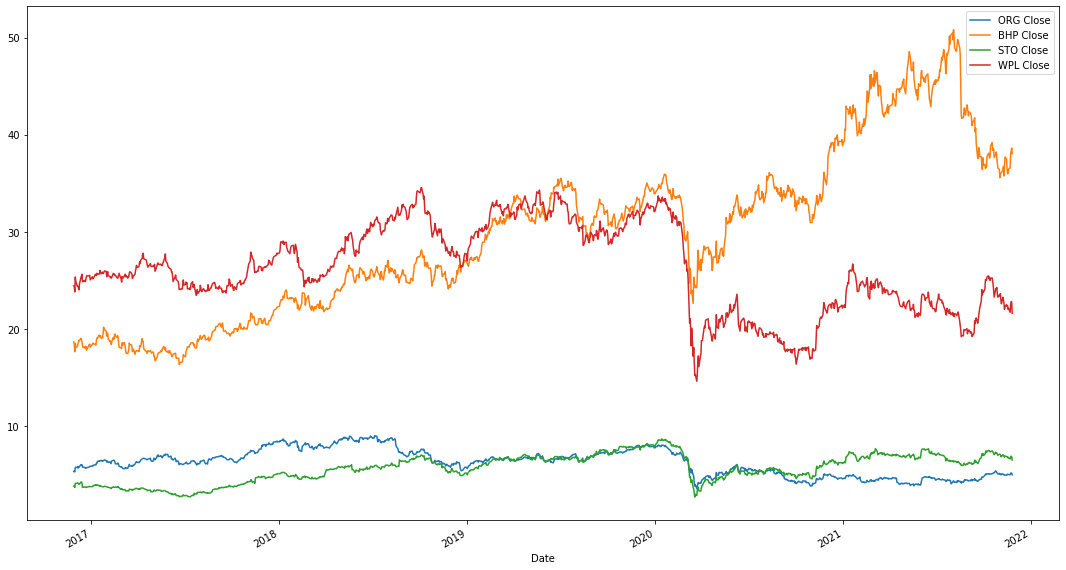

In [102]:
import matplotlib as plt
df.plot()
fig = plt.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [67]:
returns=df.pct_change()

In [ ]:
returns.tail()

#Setting up our fictitious portfolio of the 4 ONG companies

In [73]:
import numpy as np
weights   = np.array([.25, .25, .25, .25]) #Allocating equal weights to the stocks in our portfolio
initinv   = 1000000 #Initial investment in dollars

#Calculating the Covariance Matrix for VaR calculation

In [103]:
cov_matrix = returns.cov()
cov_matrix

,ORG Close,BHP Close,STO Close,WPL Close
ORG Close,0.000418,0.000171,0.000359,0.000268
BHP Close,0.000171,0.000296,0.000223,0.000186
STO Close,0.000359,0.000223,0.000644,0.000363
WPL Close,0.000268,0.000186,0.000363,0.000344


#Calculating portfolio mean and standard **deviation**

In [83]:
avgreturns = returns.mean()
avgreturns

ORG Close    0.000158
BHP Close    0.000711
STO Close    0.000747
WPL Close    0.000078
dtype: float64

In [84]:
portfoliomean  = avgreturns.dot(weights)                           #Making the returns proportional with the weighting of our portfolio

In [85]:
portfoliostd = np.sqrt(weights.T.dot(cov_matrix).dot(weights))     #Computing the standard deviation of our portfolio after adjusting for weights

In [86]:
invmean        = (1+portfoliomean) * initinv                       #Computing the mean of our investment amount

In [87]:
invstd         = initinv * portfoliostd                            #Computing the standard deviation of our investment

#Computing the Value at Risk

In [88]:
from scipy.stats import norm

In [92]:
conf = 0.05                                                       #Asserting the confidence interval at 95%

In [93]:
confcutoff = norm.ppf(conf, invmean, invstd)                      #Defining the "cutoff" value where our 95% CI sits

In [94]:
var = initinv - confcutoff                                        #Calculating the VaR as Initial Investment value minus the cutoff

In [95]:
var

28195.09719076578

#Interpretation

The VaR value above of 28,195 means that:

We can say with 95% confidence that on an initial investment of AUD 1 million, our losses will NOT exceed AUD 28,195.